# Nelder–Mead method

In the previous subsection,
the **gradient methods** require the objective function
to be once or twice continously differentiable.

The **Nelder–Mead method** {cite}`Nelder1965`
described in this subsection,
requires the objective function to be **continous only**.
Therefore it is an example
of a **derivative-free** optimization method.

This method is implemented in the Matlab/Octave function
[`fminsearch`](https://www.mathworks.com/help/matlab/ref/fminsearch.html).
See {cite}`Lagarias1998` and {cite}`Price2002` for modifications
and references.

Basic concept of this method is a **simplex** (**polyhedron**),
here defined as a set of $n + 1$ linear independent points
$P = \{ x_1, x_2, \ldots, x_{n + 1} \} \subset \mathbb{R}^{n}$
(the vertices of the simplex).

In geometry the convex hull of $P$ is usually defined as simplex.
For dimension $n = 2$,
the simplex is a **non-degenerate triangle**,
as in the following figure.
For dimension $n = 3$, a non-degenerate tetrahedron.

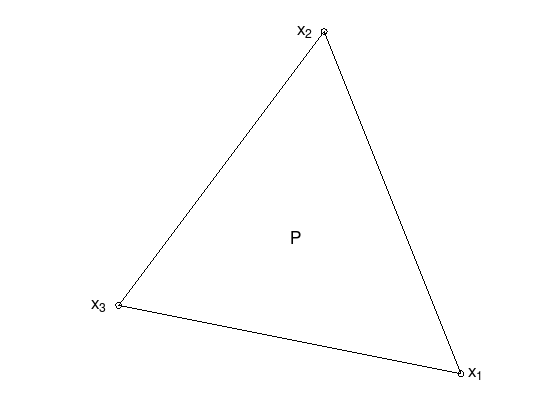

In [1]:
x1 = [ 0.0, 0.0];
x2 = [-0.4, 1.0];
x3 = [-1.0, 0.2];
x = [x1; x2; x3; x1];
x_label = {'x_1', 'x_2', 'x_3'};
plot (x(:,1), x(:,2), 'ko-');
hold on;

tprops = {'FontSize', 18};
for i = 1:3
  if (x(i,1) < 0)
    x_offset = -0.08;
  else
    x_offset = 0.02;
  end
  text (x(i,1) + x_offset, x(i,2), x_label{i}, tprops{:});
end

text (-0.5, 0.4, 'P', tprops{:});
axis equal;
axis off;

## Iteration step of the simplex method ($n \geq 2$)

1. Compute the following indices $s, a, b \in \{ 1, \ldots, n + 1 \}$:

   - $x^{s} := \operatorname{argmax} \{ f(x) \colon x \in P \}$ (worst point)

   - $x^{a} := \operatorname{argmax} \{ f(x) \colon x \in P, a \neq s \}$ (second worst point)

   - $x^{b} := \operatorname{argmin} \{ f(x) \colon x \in P, b \neq s, b \neq a \}$ (best point)

2. Compute the **centroid** $m$ of the $n$ best points

   $$
   m := \frac{1}{n} \sum_{\substack{i = 0 \\ i \neq s}}^{n + 1} x^i,
   $$
   
   and the point $r$ **reflected** at the center $m$
   
   $$
   r := m + \alpha (m - x^s),
   $$
   
   with $\alpha = 1$.

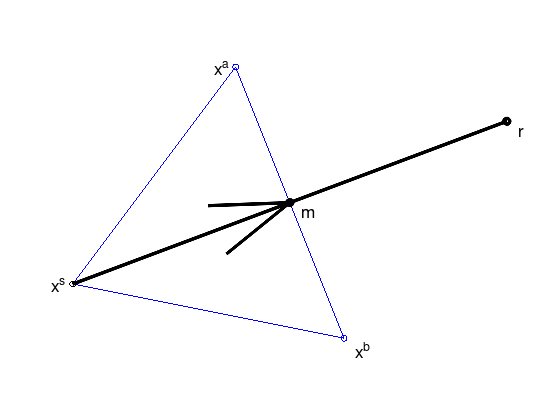

In [2]:
function plot_line (points, LineSpec)
  plot (points(:,1), points(:,2), LineSpec{:});
end

function plot_triangle (points, LineSpec)
  % Repeat first point.
  plot_line ([points; points(1,:)], LineSpec);  
end

xb = [ 0.0, 0.0];
xa = [-0.4, 1.0];
xs = [-1.0, 0.2];
m = xb + 0.5 * (xa - xb);
r = m  +        (m - xs);

points = [xb; xa; xs; m; r];
plabel = {'x^b', 'x^a', 'x^s', 'm', 'r'};

plot_triangle ([xb; xa; xs], {'bo-'});
hold on;
quiver (xs(1), xs(2), m(1) - xs(1), m(2) - xs(2), 'ko-', 'LineWidth', 4);
plot_line ([r ; m], {'ko-', 'LineWidth', 4});

tprops = {'FontSize', 18};
for i = 1:length (plabel)
  if (points(i,1) < -0.3)
    x_offset = -0.08;
    y_offset = 0.0;
  else
    x_offset = 0.04;
    y_offset = -0.04;
  end
  text (points(i,1) + x_offset, points(i,2) + y_offset, plabel{i}, tprops{:});
end

axis equal;
axis off;

### Case 1: Reflect

> "New point is good."

Replace $x^s$ by $r$, if $f(x^b) \leq f(r) \leq f(x^a)$ and **case 2** does not apply.

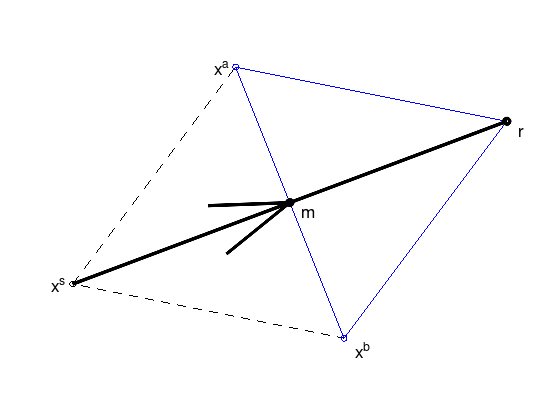

In [3]:
function plot_line (points, LineSpec)
  plot (points(:,1), points(:,2), LineSpec{:});
end

function plot_triangle (points, LineSpec)
  % Repeat first point.
  plot_line ([points; points(1,:)], LineSpec);  
end

xb = [ 0.0, 0.0];
xa = [-0.4, 1.0];
xs = [-1.0, 0.2];
m = xb + 0.5 * (xa - xb);
r = m  +        (m - xs);

points = [xb; xa; xs; m; r];
plabel = {'x^b', 'x^a', 'x^s', 'm', 'r'};

plot_triangle ([xb; xa; xs], {'ko--'});
hold on;
plot_triangle ([xb; xa; r] , {'bo-'});
quiver (xs(1), xs(2), m(1) - xs(1), m(2) - xs(2), 'ko-', 'LineWidth', 4);
plot_line ([r ; m], {'ko-', 'LineWidth', 4});

tprops = {'FontSize', 18};
for i = 1:length (plabel)
  if (points(i,1) < -0.3)
    x_offset = -0.08;
    y_offset = 0.0;
  else
    x_offset = 0.04;
    y_offset = -0.04;
  end
  text (points(i,1) + x_offset, points(i,2) + y_offset, plabel{i}, tprops{:});
end

axis equal;
axis off;

### Case 2: Expand

> "New point is excellent."

If $f(r) < f(x^b)$, compute **expanded point**

$$
e := m + \beta (m - x^s),
$$

with $\beta > \alpha$, here $\beta = 2$.

Replace $x^s$ by $e$, if $f(e) < f(r)$, otherwise replace $x^s$ by $r$.

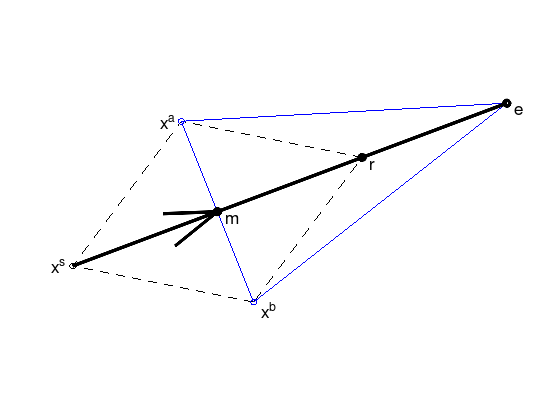

In [4]:
function plot_line (points, LineSpec)
  plot (points(:,1), points(:,2), LineSpec{:});
end

function plot_triangle (points, LineSpec)
  % Repeat first point.
  plot_line ([points; points(1,:)], LineSpec);  
end

xb = [ 0.0, 0.0];
xa = [-0.4, 1.0];
xs = [-1.0, 0.2];
m = xb + 0.5 * (xa - xb);
r = m  + 1.0 *  (m - xs);
e = m  + 2.0 *  (m - xs);

points = [xb; xa; xs; m; r; e];
plabel = {'x^b', 'x^a', 'x^s', 'm', 'r', 'e'};

plot_triangle ([xb; xa; xs], {'ko--'});
hold on;
plot_triangle ([xb; xa; r] , {'ko--'});
plot_triangle ([xb; xa; e] , {'bo-'});
quiver (xs(1), xs(2), m(1) - xs(1), m(2) - xs(2), 'ko-', 'LineWidth', 4);
plot_line ([e; r; m], {'ko-', 'LineWidth', 4});

tprops = {'FontSize', 18};
for i = 1:length (plabel)
  if (points(i,1) < -0.3)
    x_offset = -0.12;
    y_offset = 0.0;
  else
    x_offset = 0.04;
    y_offset = -0.04;
  end
  text (points(i,1) + x_offset, points(i,2) + y_offset, plabel{i}, tprops{:});
end

axis equal;
axis off;

### Case 3: Contract / Shrink

> "New point is worse."

If $f(r) > f(x^a)$, compute a contracting point
with $0 < \gamma < \alpha$, here $\gamma = 0.5$:

- If $f(r) > f(x^s)$, **contract inside**

  $$
  c := m - \gamma (m - x^s)
  $$

- Otherwise **contract outside**

  $$
  c := m + \gamma (m - x^s)
  $$

Replace $x^s$ by $c$, if $f(c) < f(x^s)$, otherwise
**shrink** (case 4) the whole simplex around $x^b$:

$$
x^i := \frac{x^i + x^b}{2},
$$

for all $i = 1, \ldots, n + 1$.

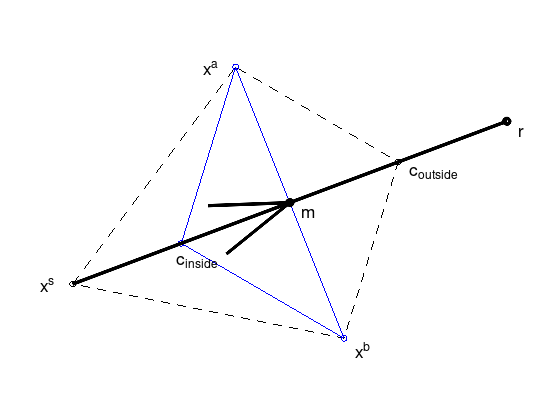

In [6]:
function plot_line (points, LineSpec)
  plot (points(:,1), points(:,2), LineSpec{:});
end

function plot_triangle (points, LineSpec)
  % Repeat first point.
  plot_line ([points; points(1,:)], LineSpec);  
end

xb = [ 0.0, 0.0];
xa = [-0.4, 1.0];
xs = [-1.0, 0.2];
m = xb + 0.5 * (xa - xb);
r =  m + 1.0 *  (m - xs);
co = m + 0.5 *  (m - xs);
ci = m - 0.5 *  (m - xs);

points = [xb; xa; xs; m; r; co; ci];
plabel = {'x^b', 'x^a', 'x^s', 'm', 'r', 'c_{outside}', 'c_{inside}'};

plot_triangle ([xb; xa; xs], {'ko--'});
hold on;
plot_triangle ([xb; xa; co] , {'ko--'});
plot_triangle ([xb; xa; ci] , {'bo-'});
quiver (xs(1), xs(2), m(1) - xs(1), m(2) - xs(2), 'ko-', 'LineWidth', 4);
plot_line ([r; m], {'ko-', 'LineWidth', 4});

tprops = {'FontSize', 18};
for i = 1:length (plabel)
  if (points(i,1) < -0.3)
    x_offset = -0.12;
    y_offset = 0.0;
  else
    x_offset = 0.04;
    y_offset = -0.04;
  end
  if (i == 7)  % c_{inner}
    x_offset = -0.02;
    y_offset = -0.07;
  end
  text (points(i,1) + x_offset, points(i,2) + y_offset, plabel{i}, tprops{:});
end

axis equal;
axis off;

This concludes one step of the simplex method.
There is no guarantee for convergence to a local minimum.

Potential stopping criteria are:

- 
  $$
  \forall i,j \in \{ 1, \ldots, n + 1 \} \colon\quad \lVert x^i - x^j \rVert \leq \text{TOL}.
  $$

- 
  $$
  \frac{1}{n + 1} \sum _{i = 1}^{n + 1} \left( f(x^i) - f(m) \right)^2 \leq (\text{TOL})^2.
  $$

- 
  $$
  \frac{1}{n + 1} \sum _{i = 1}^{n + 1} \left( f(x^i) - \bar{f} \right)^2 \leq (\text{TOL})^2, \quad
  \bar{f} := \frac{1}{n + 1} \sum _{i = 1}^{n + 1} f(x^i).
  $$

## Start simplex

Given one vertex $x^1$ and one edge length $l$, a regular simplex can be constructed as follows:

-
  $$
  p := \frac{l}{\sqrt{2}} \frac{\sqrt{n + 1} - 1}{n}
  $$

-
  $$
  q := p (1, \ldots, 1)^{T} \in \mathbb{R}^{n}
  $$

-
  $$
  x^j := x^1 + q + \frac{l}{\sqrt{2}} e^{j-1}, \quad j = 2, \ldots, n + 1,
  $$
  
  where $e^1, \ldots, e^n$ are the standard unit vectors in $\mathbb{R}^{n}$.